## Simulate and fit DG model for constant firing rate

Demoscript to sample from Dichotomized Gaussian model with specified correlation coefficients and fixed firing rate per neuron, from the paper *'Generating spike-trains with specified correlations', Macke et al., Neural Computation 2008*

Note: this code mirrors the demoscript from the CorBinian toolbox (https://github.com/mackelab/CorBinian), and reproduces the same results as from section 1. in *demo/demo_dich_gauss_01.m*


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from  os import makedirs

from dg_python.dichot_gauss import DichotGauss, make_symmetric, cov_to_corr
from dg_python.optim_dichot_gauss import DGOptimise

import yaml

In [2]:
timebins = 1
trials = int(1e5)
num_neur = 2

In [3]:
# Set mean and correlation matrix
mean = np.array([.4, .3]).reshape(1, num_neur)
var = mean * (1 - mean)
cov = np.eye(num_neur)
cov[0, 1], cov[1, 0] = .1, .1
corr = cov_to_corr(cov)

print("Mean : ", mean)
print("Correlation matrix : ", corr)

Mean :  [[0.4 0.3]]
Correlation matrix :  [[0.99999999 0.1       ]
 [0.1        0.99999999]]


In [4]:
# Sample from DG model
dg = DichotGauss(num_neur, mean=mean, corr=cov, make_pd=True)
y = dg.sample(repeats=trials)

In [5]:
y.shape # Data MUST have shape timebins x repeats x neurons

(1, 100000, 2)

In [6]:
y.squeeze().shape

(100000, 2)

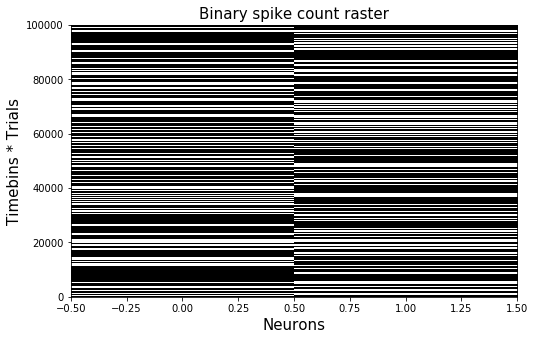

In [7]:
# # Visualise y
# plt.subplots(figsize=(8, 5))
# plt.imshow(y.reshape(-1, num_neur), aspect='auto', origin='lower', cmap='binary')
# plt.title('Binary spike count raster', fontsize=15)
# plt.xlabel('Neurons', fontsize=15)
# plt.ylabel('Timebins * Trials', fontsize=15)
# plt.show()

In [9]:
# Do optimisation
dgopt = DGOptimise(data=y)    # Initialise optimiser

cov_y = dgopt.data_tfix_covariance    # Covariance of data
mean_hat = dgopt.gauss_mean    # Estimate of mean of multivariate Gaussian from data

corr_hat = dgopt.get_gauss_correlation(set_attr=True)    # Estimate of multivariate Gaussian correlation matrix

In [15]:
print('Target mean X1:  %.2f     Estimated mean X1:  %.3f\n' %(mean[:, 0], mean_hat[:, 0]))
print('Target mean X2:  %.2f     Estimated mean X2:  %.3f\n' %(mean[:, 1], mean_hat[:, 1]))
print('Target cov X1X2: %.2f     Estimated cov X1X2: %.3f\n' %(corr[1, 0], corr_hat[0, 1]))

Target mean X1:  0.40     Estimated mean X1:  0.393

Target mean X2:  0.30     Estimated mean X2:  0.305

Target cov X1X2: 0.10     Estimated cov X1X2: 0.106

